In [1]:
import import_data
import pandas as pd

df = import_data.import_data("C:/Users/make_/David/random/Data/*20*.dat")
df.head()

,date_,store,department,item,unit_price,quantity,on_promotion,promotion_type
0,20090102,315,2,8598,5.61,12.0,0,0
1,20090102,315,2,22631,11.88,15.0,0,0
2,20090102,315,2,102257,9.21,9.0,0,0
3,20090102,315,2,263929,16.11,6.0,0,0
4,20090102,315,2,423218,14.91,6.0,0,0


In [2]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date_,1352325.0,2.010075e+07,8120.917226,20090102.00,20091009.0,20100707.00,20110405.0,20111231.00
store,1352325.0,4.261672e+02,94.225506,315.00,364.0,401.00,442.0,671.00
department,1352325.0,2.937067e+00,0.973425,1.00,2.0,3.00,4.0,4.00
item,1352325.0,3.693021e+05,188315.099115,3683.00,194781.0,431714.00,532196.0,593171.00
unit_price,1352325.0,7.734264e+00,6.902699,0.02,3.0,5.94,10.0,117.75
quantity,1352325.0,1.977911e+01,99.897643,1.50,4.0,9.00,19.5,23376.00
on_promotion,1352325.0,2.227556e-01,0.416096,0.00,0.0,0.00,0.0,1.00
promotion_type,1352325.0,1.121441e+00,2.178190,0.00,0.0,0.00,0.0,6.00


In [3]:
df.shape

(1352325, 8)

In [4]:
X = df.drop(['date_', 'store', 'quantity', 'on_promotion'], axis = 1)
y = df['quantity']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [49]:
import import_data
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix

df = import_data.import_data("C:/Users/make_/David/random/Data/*20*.dat")
df.head()
df.describe().transpose()
#X = df.drop(['date_', 'store', 'quantity', 'on_promotion'], axis = 1)
X = df[['department', 'promotion_type', 'unit_price']]
y = np.asarray(df['quantity'], dtype = "S32")
y = y.astype('float64')
X_train, X_test, y_train, y_test = train_test_split(X, y)
scaler = StandardScaler()
scaler.fit(X_train)
StandardScaler(copy=True, with_mean=True, with_std=True)
# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)
mlp = MLPRegressor(hidden_layer_sizes=(25, 25, 25),  activation='relu', solver='adam', random_state=9, max_iter=1000)
mlp.fit(X_train,y_train)
predictions = mlp.predict(X_test)
print(predictions)
print(y_test)
#print(confusion_matrix(y_test, predictions))
#print(classification_report(y_test, predictions))
df_out = import_data.import_data("C:/Users/make_/David/random/Data/hackathon_result.dat")
X_out = df_out[['department', 'promotion_type', 'unit_price']]
scaler.fit(X_out)
X_out= scaler.transform(X_out)
y_out = mlp.predict(X_out)
for i in range(len(y_out)):
    y_out[i] = int(round(y_out[i]))
print(y_out)

[  9.399192     5.12716729   5.46628011 ...,  12.00561319   9.31467499
  22.49049941]
[ 15.   4.   6. ...,   6.   9.  39.]
[  8.   8.   8. ...,  88.  11.   8.]


In [50]:
mlp.score(X_test, y_test)

0.11945044536680827

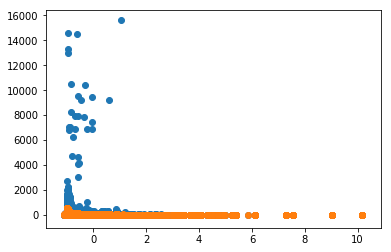

In [51]:
plt.scatter(X_test[:, 2], y_test)
plt.scatter(X_test[:, 2], predictions)
plt.show()

In [52]:
y_out.shape

(33722,)